In [8]:
# import
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set()

In [23]:
def CRR(S0,K,T,risk_free,volatility,n,optiontype='call',div=0,t=0,divtype='C',type=''):
    if divtype=='C':
        dT=T/n
        u=math.exp(volatility*math.sqrt(dT))
        d=1/u
        S=np.zeros(math.factorial(n-1))
        b=risk_free-div
        S[0]=S0
        S[1]=S0*u
        S[2]=S0*d
        nr=3
        for i in range(3,n+2):
            ok=0
            for j in range(i,i*2):
                if ok==0:
                    S[nr]=S[nr-i+1]*u
                    ok=1
                    nr=nr+1
                    S[nr]=S[nr-i]*d

                else:
                    nr=nr+1
                    S[nr]=S[nr-i]*d
        S=S[S!=0]
        S=S[0:-1]
        V=np.zeros(len(S))
        e=math.exp(-risk_free*dT)
        ok=n+1
        p=1/2+1/2*(b-1/2*volatility**2)*(math.sqrt(dT)/volatility)
        nr=0
        nr2=n
        for i in range(0,len(S)):
            if ok>0:
                
                if optiontype=='call':
                    V[len(S)-1-i]=S[len(S)-1-i]-K
                else :
                    V[len(S)-1-i]=K-S[len(S)-1-i]
                if V[len(S)-1-i]<0:
                    V[len(S)-1-i]=0
                ok=ok-1
            else:
                nr=nr+1
                V[len(S)-1-i]=e*(p*V[len(S)-i+nr2-1]+(1-p)*V[len(S)-i+nr2])
                if V[len(S)-1-i]<0:
                    V[len(S)-1-i]=0
                if nr==nr2:
                    nr=0
                    nr2=nr2-1
        V=np.round(V,3)
        G=nx.Graph()
        G.add_node(0,value=V[0],pos=(0,3))
        G.add_node(1,value=V[1],pos=(1,4))
        G.add_node(2,value=V[2],pos=(1,2))
        G.add_edge(0,1)
        G.add_edge(0,2)
        nr=0
        nr2=3
        poz=5
        poz2=5
        poz3=2
        for i in range(3,len(S)):
            G.add_node(i,value=V[i],pos=(poz3,poz))
            nr=nr+1
            poz=poz-2
            if nr==nr2:
                for j in range(i-poz3+1-nr,i-poz3):
                    G.add_edge(j,j+poz3)
                    G.add_edge(j,j+poz3+1)  
                poz2=poz2+1
                poz=poz2
                nr=0
                poz3=poz3+1
                nr2=nr2+1
        labels={}
        for i in G:
             labels[i]=G.node[i]['value'] 
        pos=nx.get_node_attributes(G,'pos')
        plt.figure()
        nx.draw_networkx(G,pos,labels,with_labels=False)
        nx.draw_networkx_labels(G,pos,labels)
        

     
    elif divtype=='D':
        if type=='Percentage':
            dT=T/n
            u=math.exp(volatility*math.sqrt(dT))
            d=1/u
            S=np.zeros(math.factorial(n-1))
            b=risk_free
            S[0]=S0
            S[1]=S0*u
            S[2]=S0*d
            nr=3
            for i in range(3,n+2):
                ok=0
                for j in range(i,i*2):
                    if ok==0:
                        S[nr]=S[nr-i+1]*u
                        ok=1
                        nr=nr+1
                        S[nr]=S[nr-i]*d

                    else:
                        nr=nr+1
                        S[nr]=S[nr-i]*d
            S=S[S!=0]
            S=S[0:-1]
            V=np.zeros(len(S))
            e=math.exp(-risk_free*dT)
            ok=n+1
            p=1/2+1/2*(b-1/2*volatility**2)*(math.sqrt(dT)/volatility)
            nr=0
            nr2=n
            for i in range(0,len(S)):
                if ok>0:
                    if optiontype=='call':
                        V[len(S)-1-i]=(1-div)*S[len(S)-1-i]-K
                    else :
                        V[len(S)-1-i]=K-(1-div)*S[len(S)-1-i]
                    if V[len(S)-1-i]<0:
                        V[len(S)-1-i]=0
                    ok=ok-1
                else:
                    nr=nr+1
                    V[len(S)-1-i]=e*(p*V[len(S)-i+nr2-1]+(1-p)*V[len(S)-i+nr2])
                    if V[len(S)-1-i]<0:
                        V[len(S)-1-i]=0
                    if nr==nr2:
                        nr=0
                        nr2=nr2-1
            V=np.round(V,3)
            G=nx.Graph()
            G.add_node(0,value=V[0],pos=(0,3))
            G.add_node(1,value=V[1],pos=(1,4))
            G.add_node(2,value=V[2],pos=(1,2))
            G.add_edge(0,1)
            G.add_edge(0,2)
            nr=0
            nr2=3
            poz=5
            poz2=5
            poz3=2
            for i in range(3,len(S)):
                    G.add_node(i,value=V[i],pos=(poz3,poz))
                    nr=nr+1
                    poz=poz-2
                    if nr==nr2:
                        for j in range(i-poz3+1-nr,i-poz3):
                            G.add_edge(j,j+poz3)
                            G.add_edge(j,j+poz3+1)  
                        poz2=poz2+1
                        poz=poz2
                        nr=0
                        poz3=poz3+1
                        nr2=nr2+1


            labels={}
            for i in G:
                labels[i]=G.node[i]['value'] 
            pos=nx.get_node_attributes(G,'pos')
            plt.figure()
            nx.draw_networkx(G,pos,labels,with_labels=False)
            nx.draw_networkx_labels(G,pos,labels)
        if  type=='Fixed':
            dT=round(T/n,2)
            u=math.exp(volatility*math.sqrt(dT))
            d=1/u
            S=np.zeros(math.factorial(n-1))
            b=risk_free
            nrt=0
            t_temp=t
            D=np.zeros(n+1)
            for j in range(0,n+2):
                if t_temp:
                    if nrt<=t_temp[0]:
                        for x in range(0,len(t_temp)):
                            D[j]=D[j]+div[x]*math.exp(-risk_free*(t_temp[x]-nrt))
                    else:
                        t_temp=np.array(t_temp)[1:]
                        for x in range(0,len(t_temp)):
                            D[j]=D[j]+div[x]*math.exp(-risk_free*(t_temp[x]-nrt))
                    nrt=nrt+dT
            S[0]=S0
            S[0]=S[0]-D[0]
            S[1]=S[0]*u
            S[2]=S[0]*d
            nr=3
            for i in range(3,n+2):
                ok=0
                for j in range(i,i*2):
                    if ok==0:
                        S[nr]=S[nr-i+1]*u
                        ok=1
                        nr=nr+1
                        S[nr]=S[nr-i]*d

                    else:
                        nr=nr+1
                        S[nr]=S[nr-i]*d
            S=S[S!=0]
            S=S[0:-1]
            V=np.zeros(len(S))      
            nr=0
            nr2=1
            e=math.exp(-risk_free*dT)
            ok=n+1
            p=1/2+1/2*(b-1/2*volatility**2)*(math.sqrt(dT)/volatility)
            nr=0
            nr2=n
            for i in range(0,len(S)):
                if ok>0:
                    if optiontype=='call':
                          V[len(S)-1-i]=S[len(S)-1-i]-K
                    else:
                        V[len(S)-1-i]=K-S[len(S)-1-i]
                    if V[len(S)-1-i]<0:
                        V[len(S)-1-i]=0
                    ok=ok-1
                else:
                    nr=nr+1
                    V[len(S)-1-i]=e*(p*V[len(S)-i+nr2-1]+(1-p)*V[len(S)-i+nr2])
                    if V[len(S)-1-i]<0:
                        V[len(S)-1-i]=0
                    if nr==nr2:
                        nr=0
                        nr2=nr2-1
            V=np.round(V,3)
            G=nx.Graph()
            G.add_node(0,value=V[0],pos=(0,3))
            G.add_node(1,value=V[1],pos=(1,4))
            G.add_node(2,value=V[2],pos=(1,2))
            G.add_edge(0,1)
            G.add_edge(0,2)
            nr=0
            nr2=3
            poz=5
            poz2=5
            poz3=2
            for i in range(3,len(S)):
                    G.add_node(i,value=V[i],pos=(poz3,poz))
                    nr=nr+1
                    poz=poz-2
                    if nr==nr2:
                        for j in range(i-poz3+1-nr,i-poz3):
                            G.add_edge(j,j+poz3)
                            G.add_edge(j,j+poz3+1)  
                        poz2=poz2+1
                        poz=poz2
                        nr=0
                        poz3=poz3+1
                        nr2=nr2+1


            labels={}
            for i in G:
                labels[i]=G.node[i]['value'] 
            pos=nx.get_node_attributes(G,'pos')
            plt.figure()
            nx.draw_networkx(G,pos,labels,with_labels=False)
            nx.draw_networkx_labels(G,pos,labels)

<IPython.core.display.Javascript object>


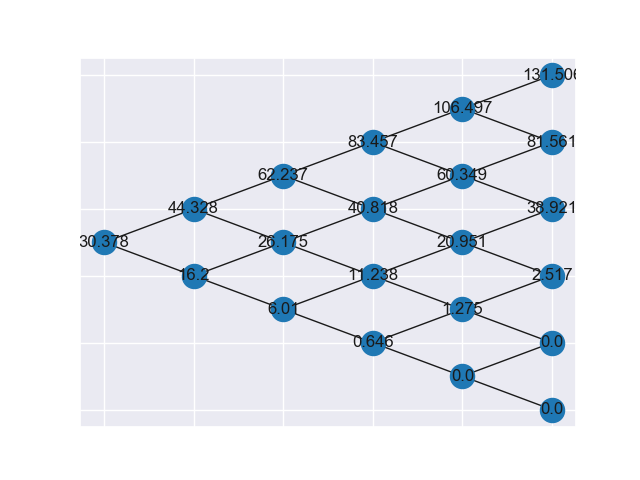

In [28]:
S0=230            # initial stock price
K=210             # strike price
T=0.5             # maturity time (in years)
risk_free=0.04545 # risk free
volatility=0.25   # standard devition of a stock randament
n=5               # time division

# estimate call option price with no divident
CRR(S0,K,T,risk_free,volatility,n,'call')
    

<IPython.core.display.Javascript object>


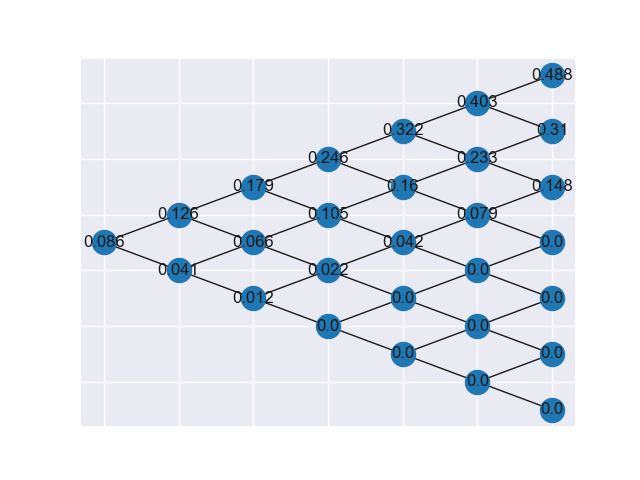

In [32]:
S0=1.5            # initial stock price
K=1.5             # strike price
T=0.33            # maturity time (in years)
risk_free=0.09    # risk free
volatility=0.20   # standard devition of a stock randament
n=6               # time division
div=0.01          # divident

# estimate call option price with continuous divident
CRR(S0,K,T,risk_free,volatility,n,'call',div,'C')
    

<IPython.core.display.Javascript object>


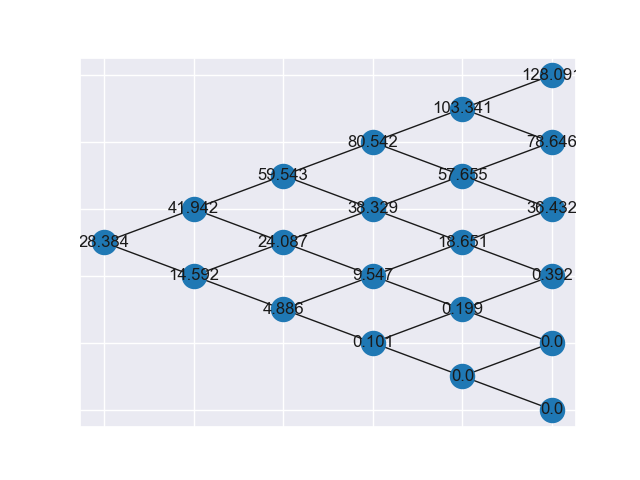

In [30]:
S0=230            # initial stock price
K=210             # strike price
T=0.5             # maturity time (in years)
risk_free=0.04545 # risk free
volatility=0.25   # standard devition of a stock randament
n=5               # time division
div=0.01          # divident

# estimate call option price for percentage discret divident
CRR(S0,K,T,risk_free,volatility,n,'call',div,0,'D','Percentage')

C:\Users\Dragos\Anaconda3\lib\site-packages\ipykernel_launcher.py:177: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


<IPython.core.display.Javascript object>


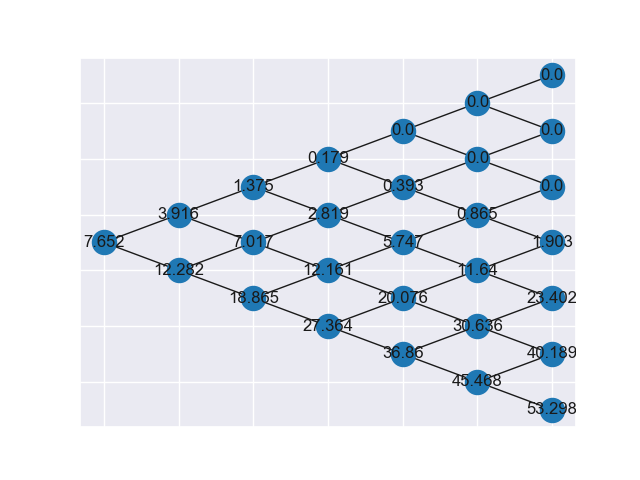

In [31]:
S0=100            # initial stock price
K=100             # strike price
T=1               # maturity time (in years)
risk_free=0.1     # risk free
volatility=0.3    # standard devition of a stock randament
n=6               # time division
div=[1,1]         # divident
t=[0.25,0.75]     # divident time

# estimate put option price for percentage discret divident
CRR(S0,K,T,risk_free,volatility,n,'put',div,t,'D','Fixed')